# Problem Statement

Outlier detection and removal using:

1. Z-score 
2. Percentile
3. IQR

# Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Description

In [2]:
df1 = pd.read_csv('/kaggle/input/climate-insights-dataset/climate_change_data.csv')

In [3]:
df1.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


#### Numerical columns

In [4]:
num_cols = []
for col in df1.columns:
    if df1[col].dtypes != 'O':
        num_cols.append(col)

#### Distribution of numerical columns

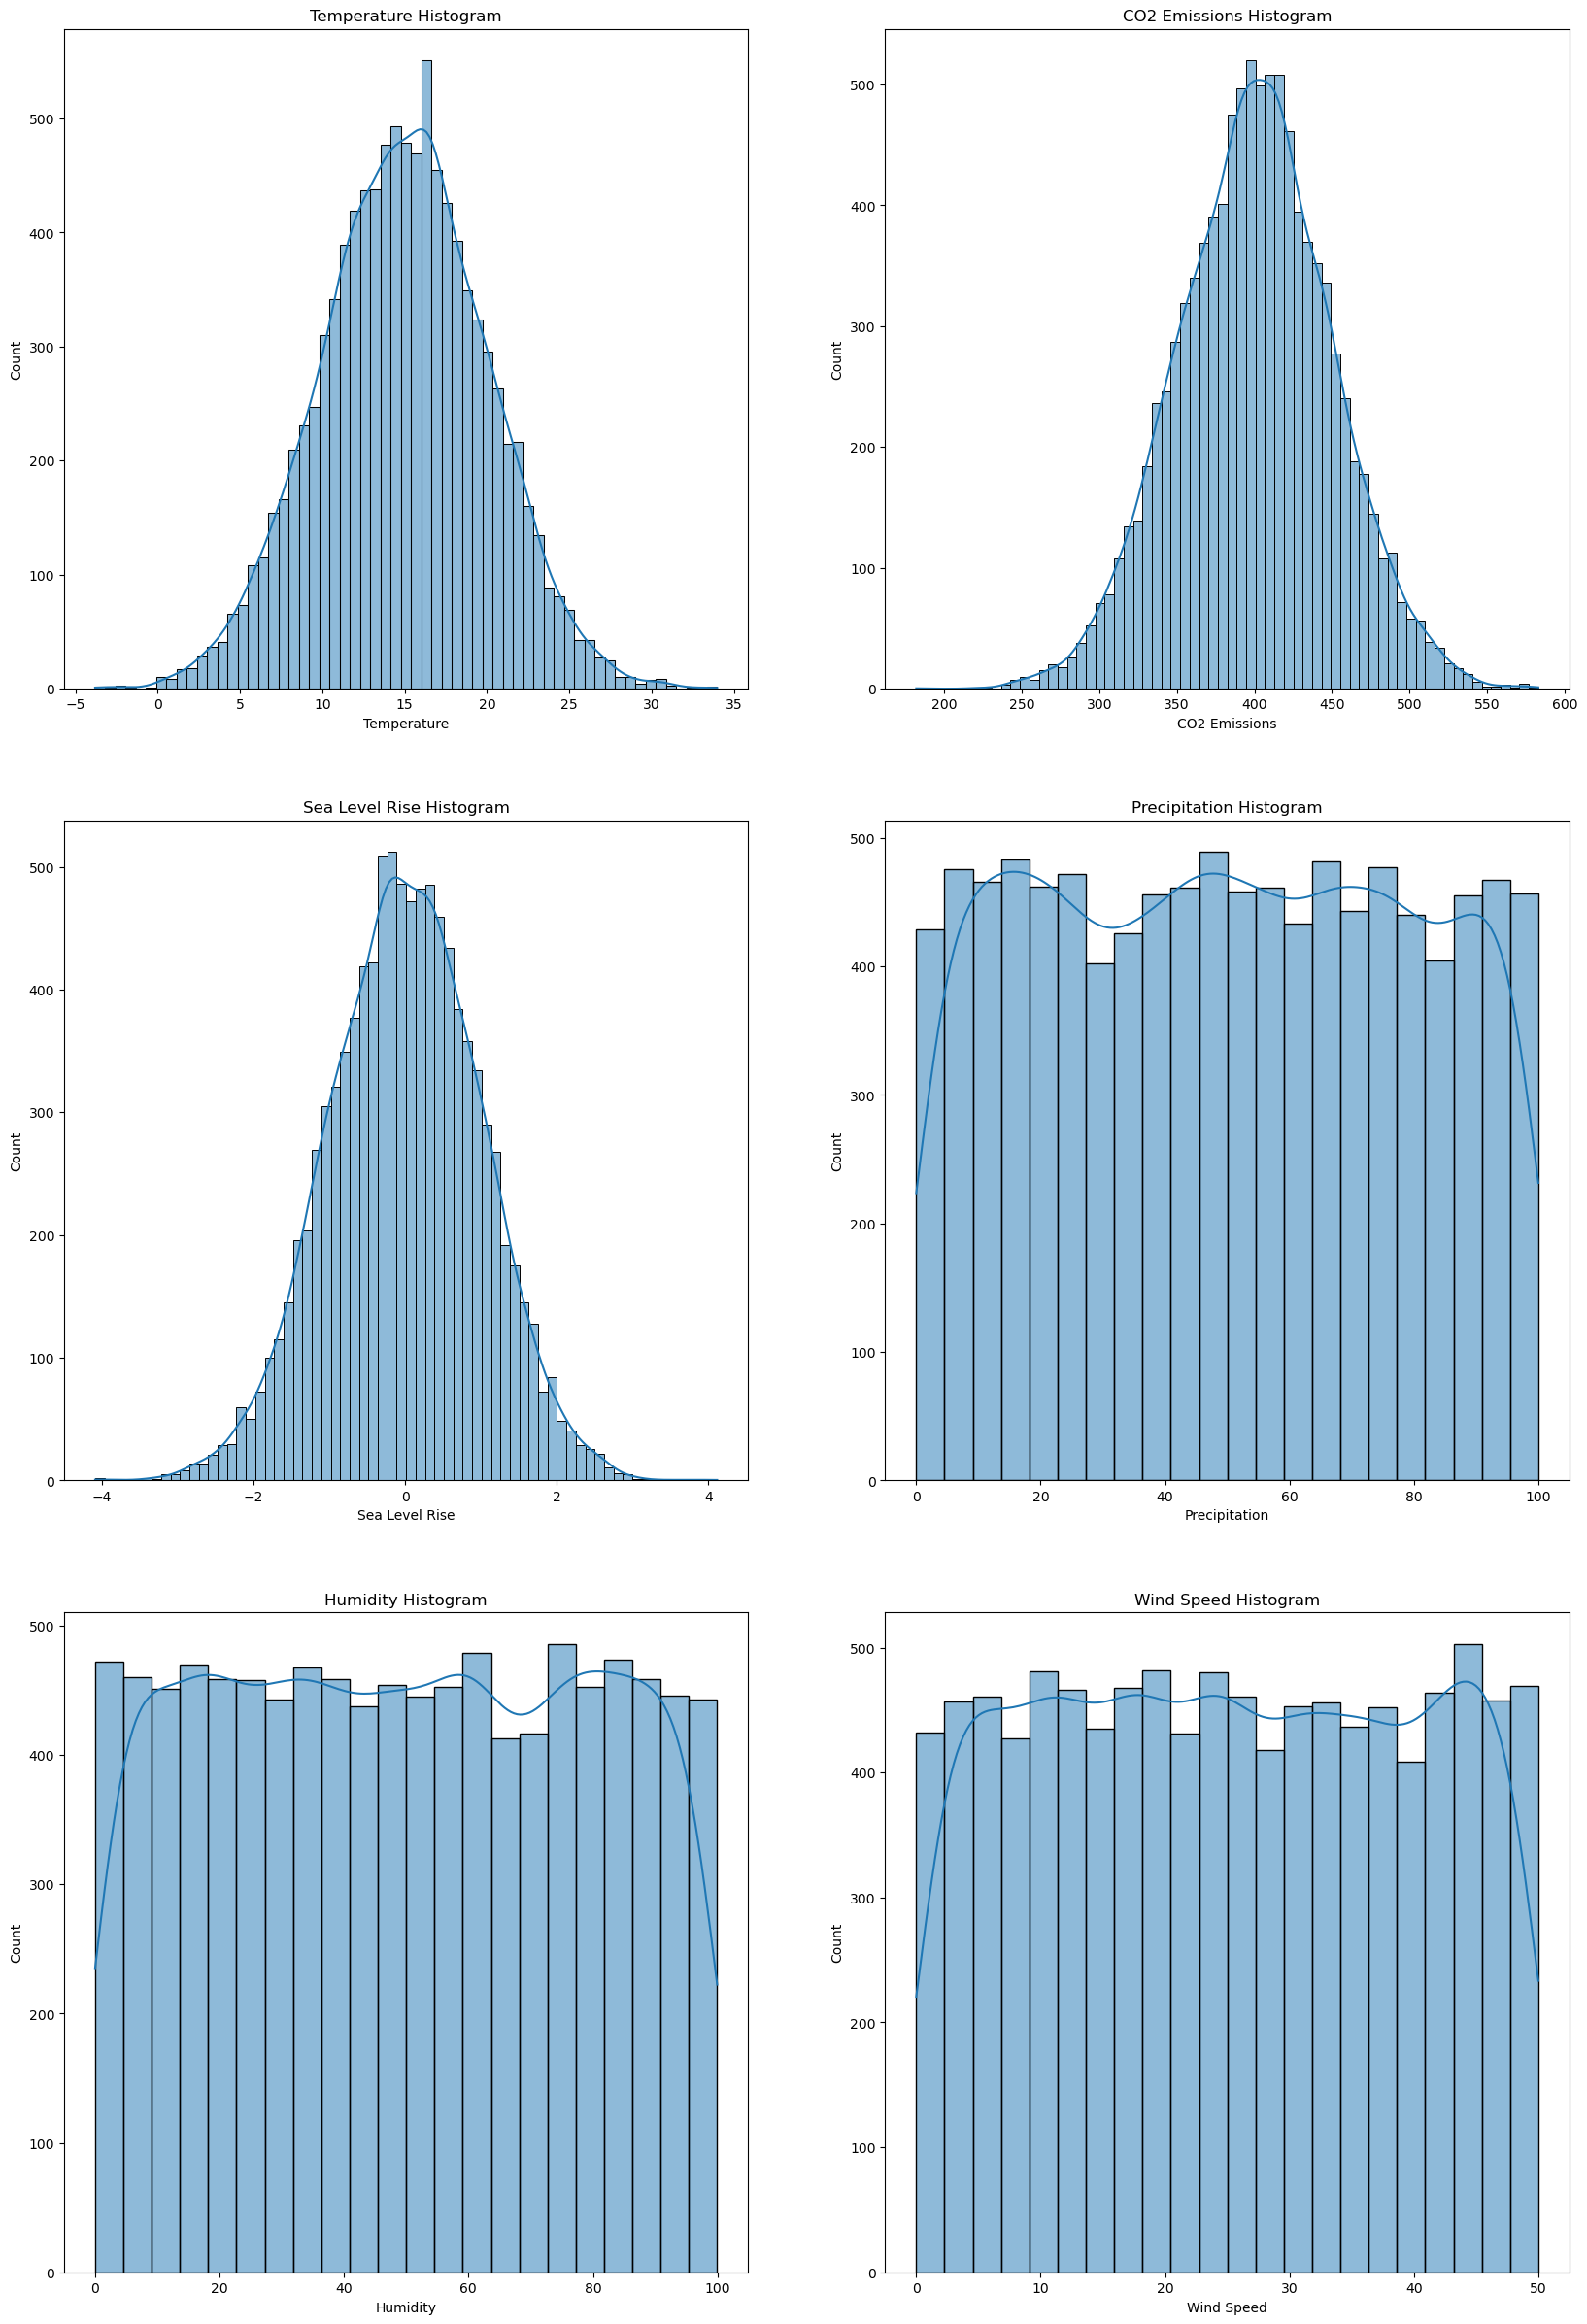

In [5]:
plt.figure(figsize = (20, 30))
for i, col in enumerate(num_cols):
    ax = plt.subplot(3, 2, i + 1)
    sns.histplot(df1[col], kde = True)
    ax.set_title(col + " Histogram")
plt.show()

# Z-score method

Z-score method can only be applied on columns with normal or almost normal distribution.    
Here, If a certain value falls outside of 3 standard deviations we can say it an outlier.  
Temperature, CO2 Emissions, Sea Level Rise are almost normal distribution. So, we will choose z-score method for it.  

### Trimming
Simply removing the outliers

In [6]:
mean = df1['Temperature'].mean()
std = df1['Temperature'].std()
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

In [7]:
df1.shape

(10000, 9)

In [8]:
# outliers
len(df1[(df1['Temperature'] < lower_limit) | (df1['Temperature'] > upper_limit)])

28

In [9]:
new_df1_1 = df1[(df1['Temperature'] >= lower_limit) & (df1['Temperature'] <= upper_limit)]

In [10]:
new_df1_1.shape

(9972, 9)

### Capping
Setting the outliers value to upper and lower limit

In [11]:
new_df1_2 = df1.copy()

In [12]:
new_df1_2['Temperature'] = np.where(df1['Temperature'] > upper_limit, 
         upper_limit,
         np.where(df1['Temperature'] < lower_limit, 
                   lower_limit,
                   df1['Temperature']
                 )
        )

In [13]:
new_df1_1.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


# Percentile Method

Percentile - describes how a compare to other scores from the same set.  
If a value is in kth percentile, it is greater than k percent of the total values.       


In percentile method, if a value is greater than 99/95 percentile(depends upon the problem statement) or less than 1/5 percentile than it is consider an outlier.

In [14]:
df2 = df1.copy()

In [15]:
df2.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


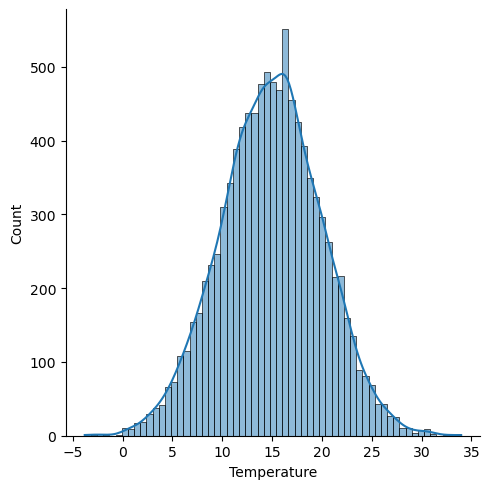

In [16]:
sns.displot(df2['Temperature'], kde = True)

In [17]:
#The value with 99th percentile
upper_limit = df2['Temperature'].quantile(0.99)
upper_limit

26.54418440413302

In [18]:
#The value with 1th percentile
lower_limit = df2['Temperature'].quantile(0.01)
lower_limit

3.158667894296705

### Trimming

In [19]:
df2.shape

(10000, 9)

In [20]:
len(df2[(df2['Temperature'] > upper_limit) | (df2['Temperature'] < lower_limit)])

200

In [21]:
new_df2_1 = df2[(df2['Temperature'] <= upper_limit) & (df2['Temperature'] >= lower_limit)]

In [22]:
new_df2_1.shape

(9800, 9)

### Capping

Capping using percentile method is called winsorization technique.

In [23]:
new_df2_2 = df2.copy()

In [24]:
new_df2_2['Temperature'] = np.where(df2['Temperature'] > upper_limit, 
         upper_limit,
         np.where(df2['Temperature'] < lower_limit,
                  lower_limit,
                  df2['Temperature']
                 )
        )

In [25]:
new_df2_2.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,26.544184,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


# IQR Method

IQR - Inter Quartile Range  
Q1 - 25th percentile   
Q2 - 50th percentile (Median)   
Q3 - 75th percentile   

Used for skewed data.   
In this method, we calculate the minimum and maximum value. If any value is less than minimum value or greater than maximum value, then it is considered as an outlier.    
IQR = Q3 - Q1   
Minimum = Q1 - 1.5 * IQR   
Maximum = Q3 + 1.5 * IQR   

In [26]:
df3 = pd.read_csv('/kaggle/input/titanic/train.csv')

In [27]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Fare', ylabel='Count'>

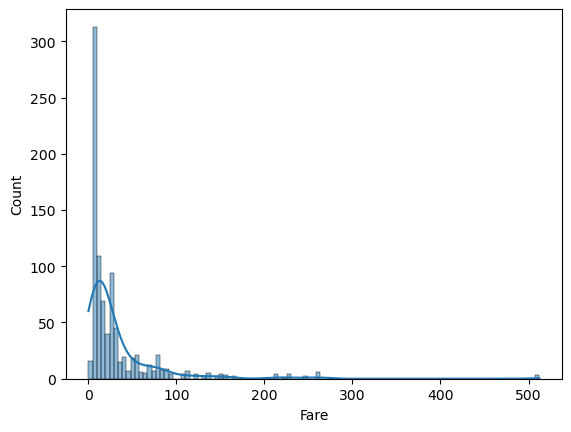

In [28]:
sns.histplot(df3['Fare'], kde = True)
#we have positively skewed data

<Axes: xlabel='Fare'>

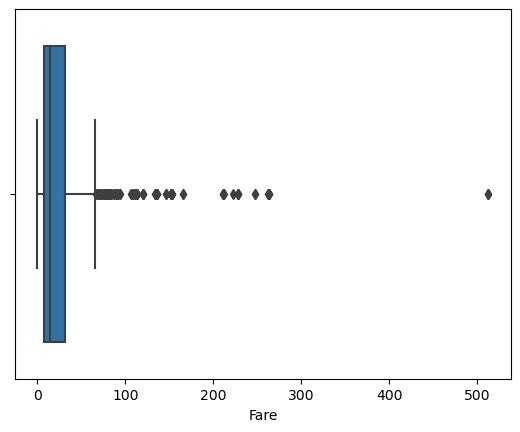

In [29]:
sns.boxplot(x = df3['Fare'])

In [30]:
q1 = df3['Fare'].quantile(0.25)
q3 = df3['Fare'].quantile(0.75)
iqr = q3 - q1

In [31]:
min_val = q1 - (1.5 * iqr)
max_val = q3 + (1.5 * iqr)

In [32]:
len(df3[(df3['Fare'] > max_val) | (df3['Fare'] < min_val)])

116

### Trimming

In [33]:
df3.shape

(891, 12)

In [34]:
new_df3_1 = df3[(df3['Fare'] < max_val) & (df3['Fare'] > min_val)]

In [35]:
new_df3_1.shape

(775, 12)

<Axes: xlabel='Fare', ylabel='Count'>

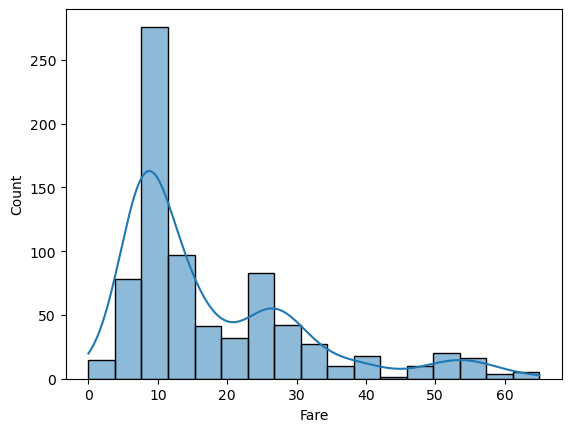

In [36]:
sns.histplot(new_df3_1['Fare'], kde = True)

<Axes: xlabel='Fare'>

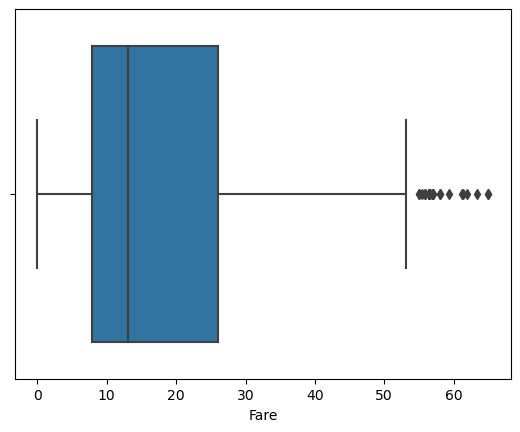

In [37]:
sns.boxplot(x = new_df3_1['Fare'])
#selfnote - why still outliers are present in the box plot

### Capping

In [38]:
new_df3_2 = df3.copy()

In [39]:
new_df3_2['Fare'] = np.where(df3['Fare'] > max_val,
         max_val,
         np.where(df3['Fare'] < min_val,
                  min_val,
                  df3['Fare']
                 )
        )

In [40]:
new_df3_2.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.00,0,0,31418,13.0000,NaN,S
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.00,1,0,PC 17761,65.6344,C86,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
393,394,1,1,"Newell, Miss. Marjorie",female,23.00,1,0,35273,65.6344,D36,C
364,365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q
